# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

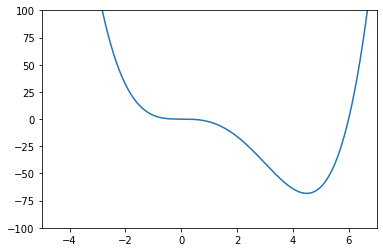

In [2]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4-3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [3]:
gamma = 0.02
def f_prime(x):    #f(x)의 미분
    return 2*x**3 - 9*x**2
x0= -5
for i in range(100):    # 최저점 구하기
    x0 = x0 - gamma*f_prime(x0)

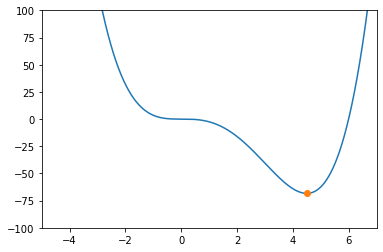

In [4]:
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))
plt.plot(x0,f(x0),'o') 

In [5]:
x0,f(x0) #최저점 좌표 

(4.5, -68.34375)


# Diabetes
## 1. sklearn을 이용하지 않고
### multi dimentional linear regression 사용
### $$ y = w_0x_0+w_1x_1+w_2x_2+w_3x_3 $$

In [6]:
from sklearn import datasets

In [7]:
diabetes = datasets.load_diabetes()

In [8]:
X_age = diabetes.data[:,0] #나이
X_bmi = diabetes.data[:,2] #bmi
X_p = diabetes.data[:,3] #혈압
Y = diabetes.target

In [9]:
x0 = np.ones(442)  # x1, x2, x3 행렬과 같게 (1,442) 행렬 만들기
x1 = X_age
x2 = X_bmi 
x3 = X_p

In [10]:
x = np.array([x0] + [x1] + [x2] + [x3])

In [11]:
x_t =np.transpose(x)
np.shape(x_t)

(442, 4)

In [12]:
b = np.linalg.inv(np.dot(x,x_t)).dot(x).dot(Y) 

In [13]:
b # 차례대로 w0, w1, w2, w3 

array([152.13348416,  25.99093614, 788.78062759, 394.1276443 ])

In [14]:
def y_pr(a,x_1,x_2,x_3):  # 예측값
    x_rd=np.array([1,x_1,x_2,x_3])
    return np.dot(a,x_rd)

def MSE(a):
    n=0
    for i in range(441):
        n = n+ ((Y[i] - y_pr(a,x1[i],x2[i],x3[i]))**2)
    return n/441

In [15]:
MSE(b)**(1/2)  # 평균오차

59.903349953046984

# Diabetes
## 2. sklearn을 이용해서

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X=np.array([X_age,X_bmi,X_p])
f=LinearRegression()
f.fit(np.transpose(X),Y)

LinearRegression()

In [18]:
f.intercept_,f.coef_  # w0, w1, w2, w3

(152.13348416289654, array([ 25.99093614, 788.78062759, 394.1276443 ]))

In [19]:
w=np.append(f.intercept_,f.coef_)

In [20]:
MSE(w)**(1/2) # 평균오차

59.90334995304698